## Creating dataframe


In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv("Data/cleaned_data.csv")

In [51]:
n_features_per_selector = [5, 10, 15]

In [52]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.0000,1.2500,0.1282,2,1,0,0,1,0,559
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,0.0508,...,0.9091,0.2041,0.0543,2,1,1,1,1,1,418
996,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,0,1,0,0,1,0,589
997,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,0,1,0,0,1,0,499
998,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,0,1,1,0,1,0,507


## Scaling

In [53]:
import json

min_scores = df.min(axis=0)
max_scores = df.max(axis=0)

json_dict = dict()
for i in range(df.shape[1]):
    json_dict[df.columns[i]] = [min_scores[i], max_scores[i]]

with open("Data/scaling_values.json", "w") as json_file:
    json.dump(json_dict, json_file, indent=4)


C:\Users\Gor78\AppData\Local\Temp\ipykernel_6456\2397610748.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  json_dict[df.columns[i]] = [min_scores[i], max_scores[i]]


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [55]:
scaled_df = scaler.fit_transform(df)

In [56]:
df = pd.DataFrame(scaled_df, columns=df.columns)

In [57]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,0.050248,0.000000,0.089184,0.000000,0.432425,0.004098,0.043671,0.023674,0.472739,0.215062,...,0.249944,0.000000,0.006247,1.0,1.0,0.0,0.0,0.0,0.0,0.288
1,0.116536,0.031316,0.052885,0.073353,0.110563,0.011820,0.134505,0.002781,0.018048,0.289972,...,0.181777,0.076844,0.022208,0.0,1.0,0.0,0.0,1.0,0.0,0.650
2,0.046696,0.007432,0.089613,0.043448,0.467560,0.084394,0.026748,0.021544,0.702353,0.136931,...,0.249944,0.142719,0.005777,1.0,1.0,0.0,0.0,1.0,0.0,0.338
3,0.121821,0.022160,0.105405,0.049655,0.210807,0.033294,0.158525,0.092339,0.507985,0.328635,...,0.249944,0.124876,0.012813,1.0,1.0,0.0,0.0,1.0,0.0,0.518
4,0.226510,0.402662,0.402024,0.485265,0.432425,0.006988,0.045729,0.008067,0.153832,0.039468,...,0.181777,0.011618,0.005677,1.0,1.0,1.0,1.0,1.0,1.0,0.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.276491,0.452082,0.012823,0.386106,0.253820,0.573278,0.190898,...,0.181777,0.020390,0.005427,1.0,1.0,1.0,1.0,1.0,1.0,0.236
996,0.122949,0.030498,0.114069,0.067711,0.226042,0.026180,0.124841,0.048499,0.338751,0.253323,...,0.181777,0.083248,0.010864,0.0,1.0,0.0,0.0,1.0,0.0,0.578
997,0.000000,0.014571,0.005154,0.200972,0.221318,0.002476,0.000000,0.000000,0.829538,0.005236,...,0.300037,0.024975,0.034462,0.0,1.0,0.0,0.0,1.0,0.0,0.398
998,0.054390,0.002748,0.101226,0.013792,0.453444,0.257831,0.046076,0.031840,0.602570,0.209021,...,0.333258,0.499525,0.006616,0.0,1.0,1.0,0.0,1.0,0.0,0.414


In [58]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

## SelectKBest with f_regression

In [59]:
from sklearn.feature_selection import SelectKBest, f_regression

In [60]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')

In [61]:
# Define the number of iterations
num_iterations = 5
scores_dict = dict()
# Iterate over the number of iterations
for iteration in range(num_iterations):
    # Randomly choose 600 rows
    chosen_idx = np.random.choice(X.shape[0], replace=False, size=600)
    
    # Subset data and labels
    data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
    label_chosen = y.iloc[chosen_idx].reset_index(drop=True)
    
    # Perform feature selection
    selected_features = fs.fit_transform(data_chosen, label_chosen)
    
    # Get indices of selected features
    # selected_indices = fs.pvalues_
    
    selected_indices = np.argsort(fs.scores_)[::-1]
    selected_features = X.columns[selected_indices]
    
    if not scores_dict:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key] = [value]
    else:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key].append(value)
        
    # Print selected features (indices)
    print(f"Iteration {iteration + 1}: Selected features indices: {list(zip(selected_features, np.sort(fs.scores_)[::-1]))}")

scores_mean_dict  = scores_dict.copy()
for key, value in scores_dict.items():
    scores_mean_dict[key] = np.mean(value)

Iteration 1: Selected features indices: [('R_DEBT_INCOME', 1804.0721363077248), ('R_DEBT_SAVINGS', 166.88885126311973), ('R_EDUCATION_INCOME', 78.37713820168378), ('R_UTILITIES_DEBT', 61.95562321919141), ('R_EXPENDITURE_DEBT', 59.78047953214619), ('DEBT', 57.53386604367864), ('R_GROCERIES_DEBT', 57.46742207783233), ('R_ENTERTAINMENT_DEBT', 48.7300357368308), ('R_EDUCATION_SAVINGS', 47.54782583581989), ('R_HEALTH_DEBT', 47.130323640463715), ('R_TAX_DEBT', 41.81830200007571), ('R_SAVINGS_INCOME', 41.285337512401604), ('R_CLOTHING_DEBT', 35.03102835012572), ('R_HOUSING_DEBT', 30.51597230041486), ('R_UTILITIES_SAVINGS', 30.015155520352383), ('R_TRAVEL_DEBT', 28.959265192938453), ('R_GROCERIES_SAVINGS', 26.449113757475192), ('CAT_CREDIT_CARD', 25.146253389463553), ('CAT_DEBT', 21.80934273010703), ('R_GROCERIES_INCOME', 20.257629212741943), ('CAT_GAMBLING', 19.977047062360302), ('R_HEALTH_SAVINGS', 17.308115167073368), ('R_EXPENDITURE', 16.99310359377011), ('R_HOUSING_SAVINGS', 16.3002568619

In [62]:
print(sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True))

[('R_DEBT_INCOME', 1734.9496033894252), ('R_DEBT_SAVINGS', 165.6674963761172), ('R_UTILITIES_DEBT', 62.005068910144345), ('R_EDUCATION_INCOME', 60.53361055802178), ('R_EXPENDITURE_DEBT', 59.881577480548756), ('DEBT', 59.251106049985175), ('R_GROCERIES_DEBT', 53.2639684870644), ('R_ENTERTAINMENT_DEBT', 51.31477075215921), ('R_TAX_DEBT', 49.018437752923816), ('R_HEALTH_DEBT', 43.13081382936437), ('R_SAVINGS_INCOME', 39.86504393994379), ('R_CLOTHING_DEBT', 38.61976676066534), ('R_TRAVEL_DEBT', 29.941438647688933), ('R_UTILITIES_SAVINGS', 28.80735334041624), ('R_HOUSING_DEBT', 28.389107714625577), ('R_EDUCATION_SAVINGS', 28.044719099423382), ('CAT_CREDIT_CARD', 27.709636269719375), ('R_HEALTH_SAVINGS', 26.81973394915517), ('R_GROCERIES_SAVINGS', 24.24742415510023), ('CAT_GAMBLING', 23.669228393135064), ('CAT_DEBT', 20.996457820389622), ('R_EXPENDITURE', 19.16554315480687), ('R_GROCERIES_INCOME', 17.04035200436519), ('R_HEALTH_INCOME', 16.498527512908453), ('R_ENTERTAINMENT', 15.12333252766

In [63]:
scores_mean_dict

{'R_DEBT_INCOME': 1734.9496033894252,
 'R_DEBT_SAVINGS': 165.6674963761172,
 'R_EDUCATION_INCOME': 60.53361055802178,
 'R_UTILITIES_DEBT': 62.005068910144345,
 'R_EXPENDITURE_DEBT': 59.881577480548756,
 'DEBT': 59.251106049985175,
 'R_GROCERIES_DEBT': 53.2639684870644,
 'R_ENTERTAINMENT_DEBT': 51.31477075215921,
 'R_EDUCATION_SAVINGS': 28.044719099423382,
 'R_HEALTH_DEBT': 43.13081382936437,
 'R_TAX_DEBT': 49.018437752923816,
 'R_SAVINGS_INCOME': 39.86504393994379,
 'R_CLOTHING_DEBT': 38.61976676066534,
 'R_HOUSING_DEBT': 28.389107714625577,
 'R_UTILITIES_SAVINGS': 28.80735334041624,
 'R_TRAVEL_DEBT': 29.941438647688933,
 'R_GROCERIES_SAVINGS': 24.24742415510023,
 'CAT_CREDIT_CARD': 27.709636269719375,
 'CAT_DEBT': 20.996457820389622,
 'R_GROCERIES_INCOME': 17.04035200436519,
 'CAT_GAMBLING': 23.669228393135064,
 'R_HEALTH_SAVINGS': 26.81973394915517,
 'R_EXPENDITURE': 19.16554315480687,
 'R_HOUSING_SAVINGS': 10.9277329882484,
 'R_HEALTH_INCOME': 16.498527512908453,
 'CAT_DEPENDENTS': 

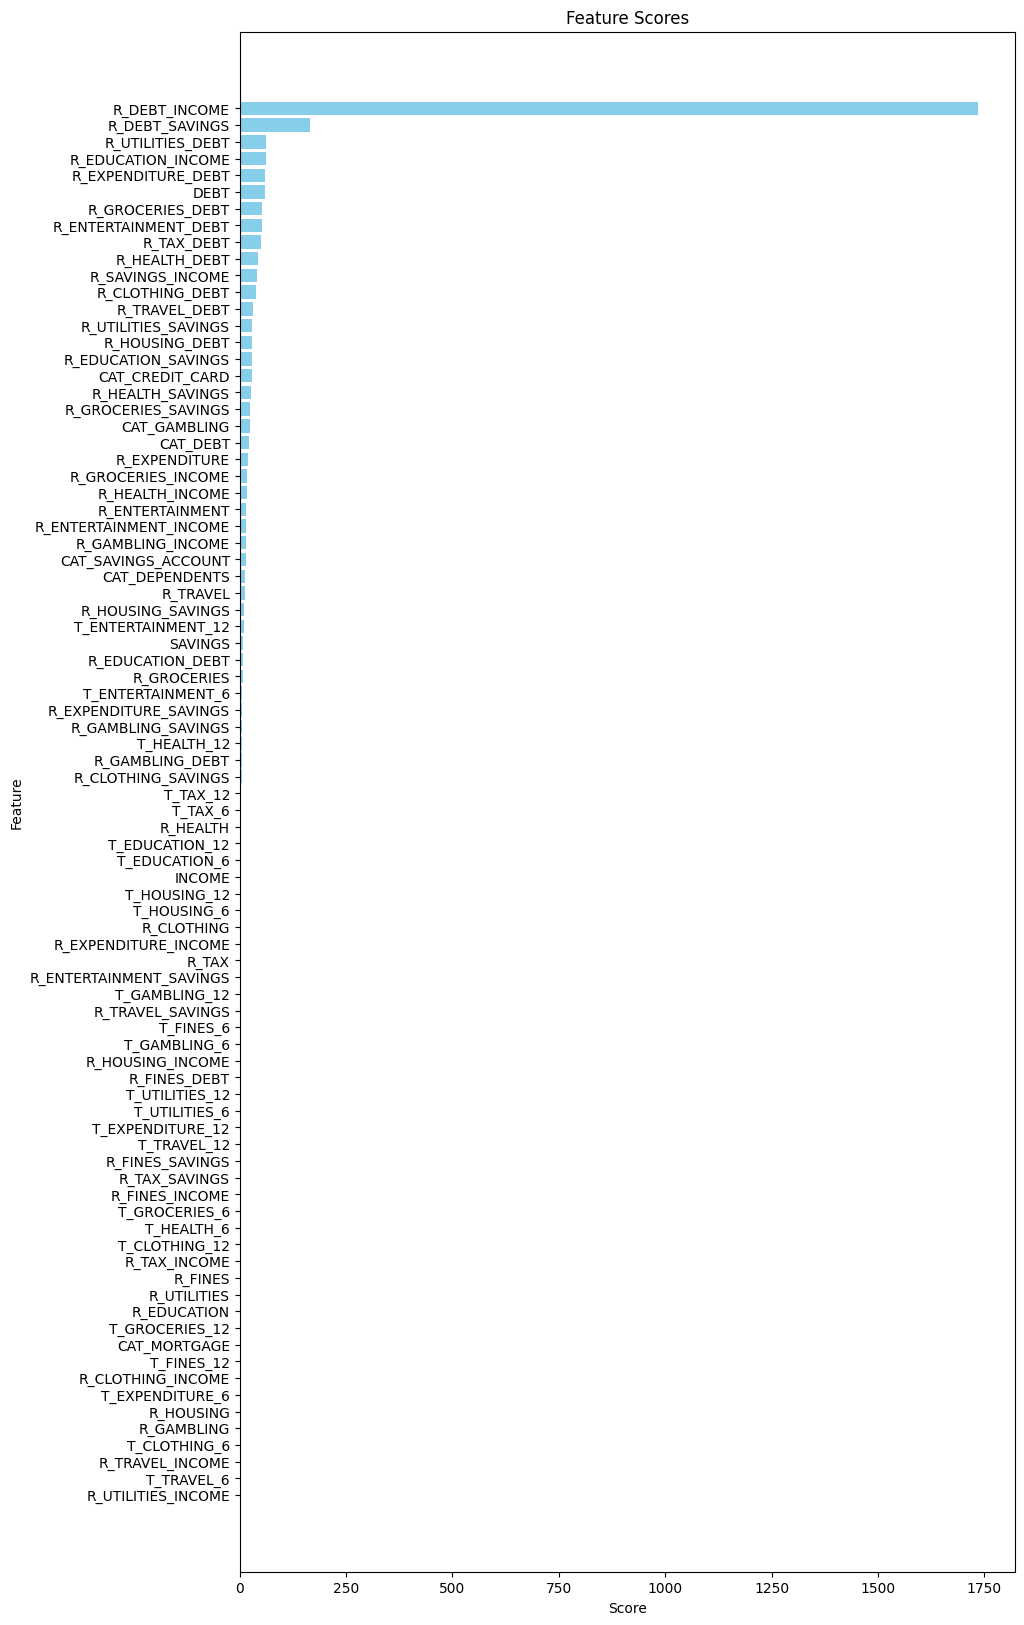

In [64]:
sorted_scores = sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in sorted_scores]
sorted_values = [x[1] for x in sorted_scores]

# Create bar plot
plt.figure(figsize=(10, 20))
plt.barh(sorted_features, sorted_values, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

In [65]:
sorted_df = X[sorted_features]

In [66]:
sorted_df

,R_DEBT_INCOME,R_DEBT_SAVINGS,R_UTILITIES_DEBT,R_EDUCATION_INCOME,R_EXPENDITURE_DEBT,DEBT,R_GROCERIES_DEBT,R_ENTERTAINMENT_DEBT,R_TAX_DEBT,R_HEALTH_DEBT,...,CAT_MORTGAGE,T_FINES_12,R_CLOTHING_INCOME,T_EXPENDITURE_6,R_HOUSING,R_GAMBLING,T_CLOTHING_6,R_TRAVEL_INCOME,T_TRAVEL_6,R_UTILITIES_INCOME
0,0.432425,0.004098,0.001717,0.000000,0.006247,0.089184,0.002984,0.001862,0.000000,0.000295,...,0.0,0.000000,0.215062,0.065182,0.529412,0.355319,0.023674,0.385050,0.072039,0.179028
1,0.110563,0.011820,0.009089,0.000000,0.022208,0.052885,0.005443,0.017533,0.016195,0.000738,...,0.0,0.000000,0.289972,0.085534,0.588235,0.586304,0.002781,0.187728,0.019731,0.235934
2,0.467560,0.084394,0.001616,0.000000,0.005777,0.089613,0.002656,0.002184,0.000000,0.000837,...,0.0,0.025334,0.136931,0.059357,0.294118,0.485265,0.021544,0.372163,0.058260,0.177110
3,0.210807,0.033294,0.003535,0.102980,0.012813,0.105405,0.002361,0.006872,0.006941,0.001624,...,0.0,0.000000,0.328635,0.138232,0.588235,0.522313,0.092339,0.222238,0.074533,0.175192
4,0.432425,0.006988,0.004343,0.000000,0.005677,0.402024,0.004754,0.000706,0.004113,0.001526,...,1.0,0.000000,0.039468,0.217015,0.588235,0.538310,0.008067,0.134460,0.077676,0.440537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.452082,0.012823,0.003535,0.000000,0.005427,0.921732,0.004459,0.000578,0.003085,0.001280,...,1.0,0.000000,0.190898,0.539999,0.588235,0.323884,0.253820,0.161738,0.247468,0.375320
996,0.226042,0.026180,0.005150,0.000000,0.010864,0.114069,0.003377,0.013615,0.010797,0.001280,...,0.0,0.000000,0.253323,0.107729,0.529412,0.364580,0.048499,0.216582,0.024303,0.273018
997,0.221318,0.002476,0.008786,0.000000,0.034462,0.005154,0.006492,0.000000,0.000000,0.002363,...,0.0,0.000000,0.005236,0.025345,0.000000,0.706988,0.000000,0.098948,0.043397,0.473785
998,0.453444,0.257831,0.001818,0.503961,0.006616,0.101226,0.003279,0.001895,0.000000,0.000689,...,0.0,0.000000,0.209021,0.088680,0.588235,0.680887,0.031840,0.263335,0.074464,0.195013


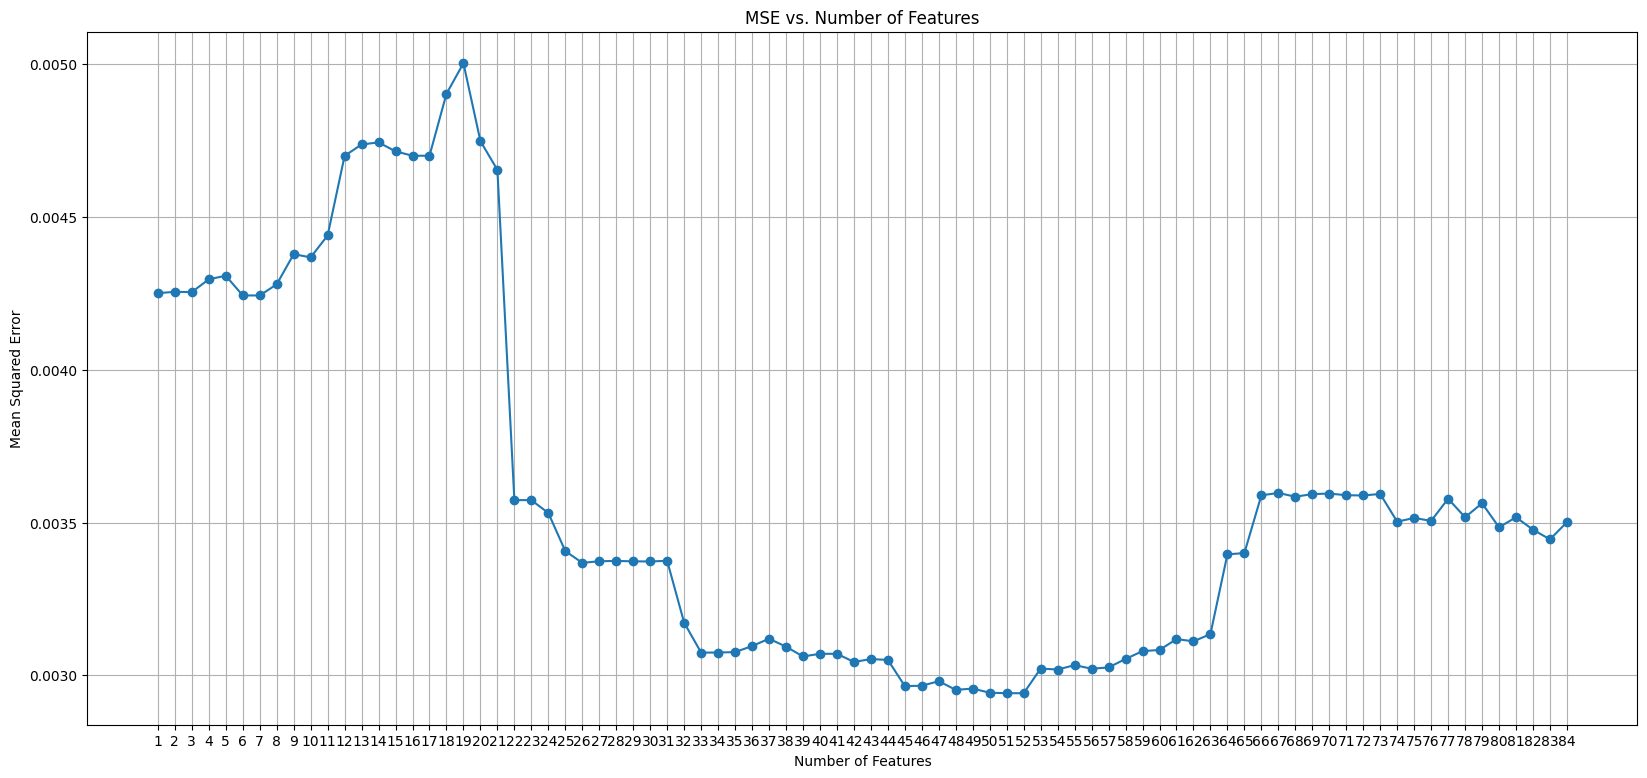

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sorted_df, y, test_size=0.3, random_state=42)


# Initialize lists to store MSE values and coefficients
mse_values = []
coefficients = []

# Iterate through each feature
for i in range(X.shape[1]):
    # Select features up to the current index
    X_i_train = X_train.iloc[:, :i+1]
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_i_train, y_train)
    
    # Predict
    X_i_test = X_test.iloc[:, :i+1]
    y_pred = model.predict(X_i_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    # Store coefficients
    coefficients.append(model.coef_)

# Plot MSE values
plt.figure(figsize=(20, 9))
plt.plot(range(1, X.shape[1]+1), mse_values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Features')
plt.xticks(range(1, X.shape[1]+1))
plt.grid(True)
plt.show()


In [68]:
selected_kbest_features = sorted_df.iloc[:, :42].columns

In [69]:
selected_kbest_features

Index(['R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'R_UTILITIES_DEBT',
       'R_EDUCATION_INCOME', 'R_EXPENDITURE_DEBT', 'DEBT', 'R_GROCERIES_DEBT',
       'R_ENTERTAINMENT_DEBT', 'R_TAX_DEBT', 'R_HEALTH_DEBT',
       'R_SAVINGS_INCOME', 'R_CLOTHING_DEBT', 'R_TRAVEL_DEBT',
       'R_UTILITIES_SAVINGS', 'R_HOUSING_DEBT', 'R_EDUCATION_SAVINGS',
       'CAT_CREDIT_CARD', 'R_HEALTH_SAVINGS', 'R_GROCERIES_SAVINGS',
       'CAT_GAMBLING', 'CAT_DEBT', 'R_EXPENDITURE', 'R_GROCERIES_INCOME',
       'R_HEALTH_INCOME', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_GAMBLING_INCOME', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS',
       'R_TRAVEL', 'R_HOUSING_SAVINGS', 'T_ENTERTAINMENT_12', 'SAVINGS',
       'R_EDUCATION_DEBT', 'R_GROCERIES', 'T_ENTERTAINMENT_6',
       'R_EXPENDITURE_SAVINGS', 'R_GAMBLING_SAVINGS', 'T_HEALTH_12',
       'R_GAMBLING_DEBT', 'R_CLOTHING_SAVINGS', 'T_TAX_12'],
      dtype='object')

In [87]:
kbest_freg_filtered1 = selected_kbest_features[:n_features_per_selector[0]]
kbest_freg_filtered2 = selected_kbest_features[:n_features_per_selector[1]]
kbest_freg_filtered3 = selected_kbest_features[:n_features_per_selector[2]]

## Lasso Regression

In [73]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((1000, 84), (1000,))

In [74]:
len(X.columns)

84

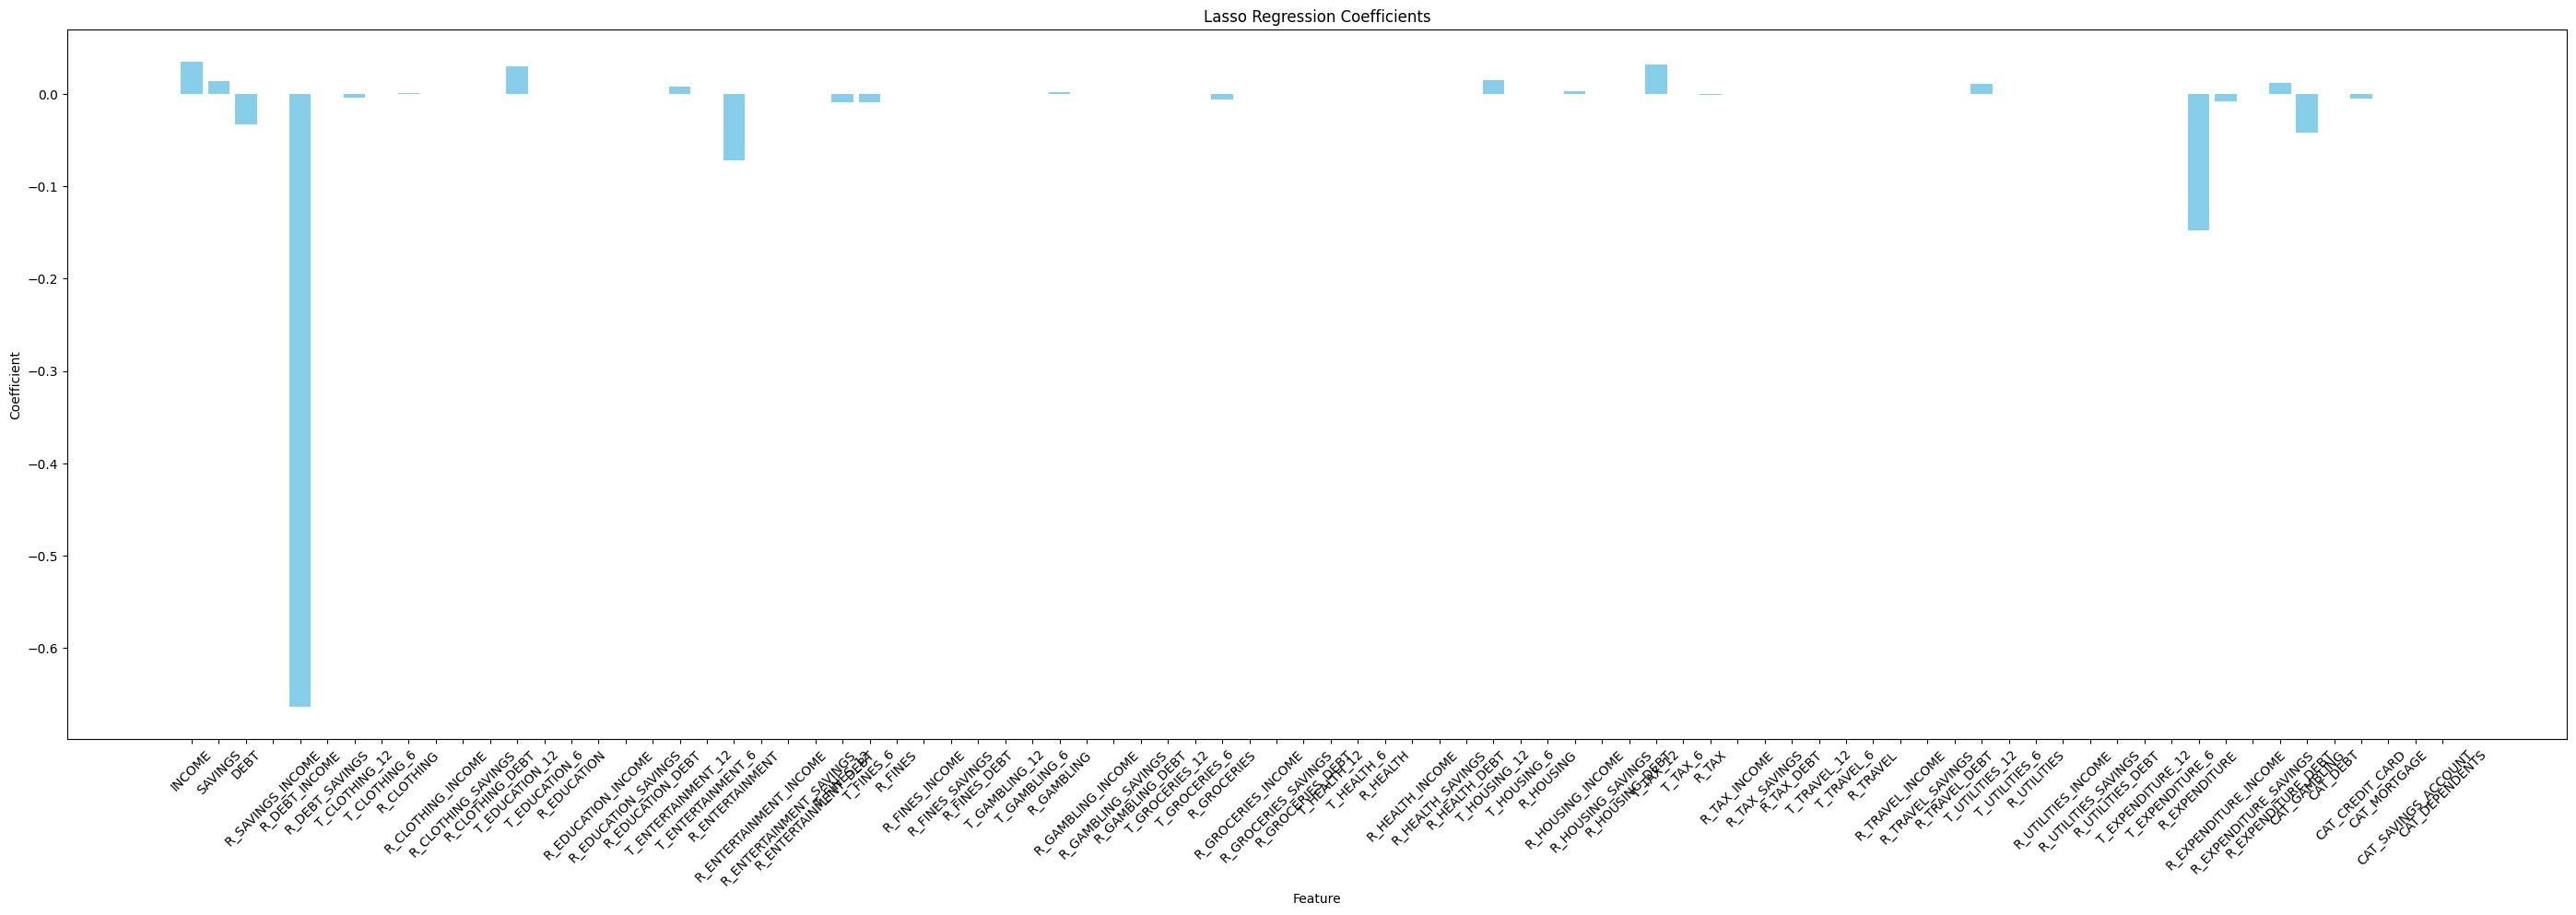

Selected Features:
Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')


In [75]:
from sklearn.linear_model import LassoCV

# Fit LassoCV model
lasso_cv = LassoCV(cv=5)  # Use cross-validation to find the best regularization parameter
lasso_cv.fit(X, y)

# Extract selected features
selected_features_lasso = X.columns[lasso_cv.coef_ != 0]

# Plot feature coefficients
plt.figure(figsize=(35, 10))
plt.bar(X.columns, lasso_cv.coef_, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

# Print selected features
print("Selected Features:")
print(selected_features_lasso)

In [77]:
lasso_filtered1 = list(X.columns[np.argsort(lasso_cv.coef_)][:n_features_per_selector[0]])
lasso_filtered2 = list(X.columns[np.argsort(lasso_cv.coef_)][:n_features_per_selector[1]])
lasso_filtered3 = list(X.columns[np.argsort(lasso_cv.coef_)][:n_features_per_selector[2]])

In [78]:
len(selected_features_lasso)

23

In [79]:
selected_df = X[selected_features_lasso]
selected_df

,INCOME,SAVINGS,DEBT,R_DEBT_INCOME,T_CLOTHING_12,R_CLOTHING,T_EDUCATION_12,T_ENTERTAINMENT_12,R_ENTERTAINMENT,T_FINES_12,...,T_HOUSING_12,R_HOUSING_INCOME,T_TAX_12,R_TAX,T_UTILITIES_12,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_CREDIT_CARD
0,0.050248,0.000000,0.089184,0.432425,0.043671,0.472739,0.000000,0.049065,0.293363,0.000000,...,0.036100,0.210919,0.000000,0.595138,0.045406,0.711912,0.249944,0.006247,1.0,0.0
1,0.116536,0.031316,0.052885,0.110563,0.134505,0.018048,0.000000,0.275776,0.287582,0.000000,...,0.196219,0.494167,0.115970,0.500900,0.138753,0.320078,0.181777,0.022208,0.0,0.0
2,0.046696,0.007432,0.089613,0.467560,0.026748,0.702353,0.000000,0.057749,0.573152,0.025334,...,0.033134,0.208119,0.000000,0.548319,0.041699,0.694415,0.249944,0.005777,1.0,0.0
3,0.121821,0.022160,0.105405,0.210807,0.158525,0.507985,0.115148,0.215036,0.300654,0.000000,...,0.151545,0.365142,0.098454,0.637455,0.107735,0.568399,0.249944,0.012813,1.0,0.0
4,0.226510,0.402662,0.402024,0.432425,0.045729,0.153832,0.000000,0.083065,0.314731,0.000000,...,0.512291,0.663556,0.231646,0.364046,0.504194,0.501060,0.181777,0.005677,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.452082,0.386106,0.573278,0.000000,0.156375,0.286576,0.000000,...,0.959925,0.566962,0.394522,0.500300,0.941524,0.605161,0.181777,0.005427,1.0,1.0
996,0.122949,0.030498,0.114069,0.226042,0.124841,0.338751,0.000000,0.461210,0.623680,0.000000,...,0.000000,0.000000,0.169870,0.499400,0.169723,0.438848,0.181777,0.010864,0.0,0.0
997,0.000000,0.014571,0.005154,0.221318,0.000000,0.829538,0.000000,0.000000,0.569382,0.000000,...,0.009367,0.478535,0.000000,0.484394,0.013071,1.000000,0.300037,0.034462,0.0,0.0
998,0.054390,0.002748,0.101226,0.453444,0.046076,0.602570,0.251694,0.057365,0.303419,0.000000,...,0.042621,0.230051,0.000000,0.473589,0.053502,0.836515,0.333258,0.006616,0.0,1.0


In [80]:
selected_df

,INCOME,SAVINGS,DEBT,R_DEBT_INCOME,T_CLOTHING_12,R_CLOTHING,T_EDUCATION_12,T_ENTERTAINMENT_12,R_ENTERTAINMENT,T_FINES_12,...,T_HOUSING_12,R_HOUSING_INCOME,T_TAX_12,R_TAX,T_UTILITIES_12,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_CREDIT_CARD
0,0.050248,0.000000,0.089184,0.432425,0.043671,0.472739,0.000000,0.049065,0.293363,0.000000,...,0.036100,0.210919,0.000000,0.595138,0.045406,0.711912,0.249944,0.006247,1.0,0.0
1,0.116536,0.031316,0.052885,0.110563,0.134505,0.018048,0.000000,0.275776,0.287582,0.000000,...,0.196219,0.494167,0.115970,0.500900,0.138753,0.320078,0.181777,0.022208,0.0,0.0
2,0.046696,0.007432,0.089613,0.467560,0.026748,0.702353,0.000000,0.057749,0.573152,0.025334,...,0.033134,0.208119,0.000000,0.548319,0.041699,0.694415,0.249944,0.005777,1.0,0.0
3,0.121821,0.022160,0.105405,0.210807,0.158525,0.507985,0.115148,0.215036,0.300654,0.000000,...,0.151545,0.365142,0.098454,0.637455,0.107735,0.568399,0.249944,0.012813,1.0,0.0
4,0.226510,0.402662,0.402024,0.432425,0.045729,0.153832,0.000000,0.083065,0.314731,0.000000,...,0.512291,0.663556,0.231646,0.364046,0.504194,0.501060,0.181777,0.005677,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.496745,0.503137,0.921732,0.452082,0.386106,0.573278,0.000000,0.156375,0.286576,0.000000,...,0.959925,0.566962,0.394522,0.500300,0.941524,0.605161,0.181777,0.005427,1.0,1.0
996,0.122949,0.030498,0.114069,0.226042,0.124841,0.338751,0.000000,0.461210,0.623680,0.000000,...,0.000000,0.000000,0.169870,0.499400,0.169723,0.438848,0.181777,0.010864,0.0,0.0
997,0.000000,0.014571,0.005154,0.221318,0.000000,0.829538,0.000000,0.000000,0.569382,0.000000,...,0.009367,0.478535,0.000000,0.484394,0.013071,1.000000,0.300037,0.034462,0.0,0.0
998,0.054390,0.002748,0.101226,0.453444,0.046076,0.602570,0.251694,0.057365,0.303419,0.000000,...,0.042621,0.230051,0.000000,0.473589,0.053502,0.836515,0.333258,0.006616,0.0,1.0


In [81]:
selected_features_lasso

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME', 'T_CLOTHING_12',
       'R_CLOTHING', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'R_ENTERTAINMENT',
       'T_FINES_12', 'T_FINES_6', 'R_GAMBLING', 'R_GROCERIES', 'T_HOUSING_12',
       'R_HOUSING_INCOME', 'T_TAX_12', 'R_TAX', 'T_UTILITIES_12',
       'R_EXPENDITURE', 'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_CREDIT_CARD'],
      dtype='object')

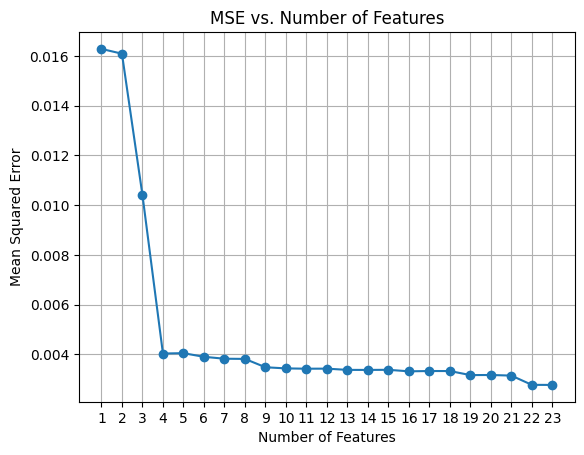

"coefficients = np.array(coefficients).T\nplt.plot(range(1, selected_df.shape[1]+1), coefficients)\nplt.xlabel('Number of Features')\nplt.ylabel('Coefficient Value')\nplt.title('Coefficients vs. Number of Features')\nplt.legend([f'Feature {i}' for i in range(1, selected_df.shape[1]+1)], loc='upper left')\nplt.grid(True)\nplt.show()"

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_df, y, test_size=0.3, random_state=42)

# Initialize lists to store MSE values and coefficients
mse_values = []
coefficients = []

# Iterate through each feature
for i in range(selected_df.shape[1]):
    # Select features up to the current index
    X_i_train = X_train.iloc[:, :i+1]
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_i_train, y_train)
    
    # Predict
    X_i_test = X_test.iloc[:, :i+1]
    y_pred = model.predict(X_i_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    # Store coefficients
    coefficients.append(model.coef_)

# Plot MSE values
plt.plot(range(1, selected_df.shape[1]+1), mse_values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Features')
plt.xticks(range(1, selected_df.shape[1]+1))
plt.grid(True)
plt.show()

# Plot coefficients
'''coefficients = np.array(coefficients).T
plt.plot(range(1, selected_df.shape[1]+1), coefficients)
plt.xlabel('Number of Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Number of Features')
plt.legend([f'Feature {i}' for i in range(1, selected_df.shape[1]+1)], loc='upper left')
plt.grid(True)
plt.show()'''


## SelectKBest with mutual_info_regression

In [83]:
from sklearn.feature_selection import mutual_info_regression
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')

In [84]:
# Define the number of iterations
num_iterations = 5
scores_dict = dict()
# Iterate over the number of iterations
for iteration in range(num_iterations):
    # Randomly choose 600 rows
    chosen_idx = np.random.choice(X.shape[0], replace=False, size=600)
    
    # Subset data and labels
    data_chosen = X.iloc[chosen_idx].reset_index(drop=True)
    label_chosen = y.iloc[chosen_idx].reset_index(drop=True)
    
    # Perform feature selection
    selected_features = fs.fit_transform(data_chosen, label_chosen)
    
    # Get indices of selected features
    # selected_indices = fs.pvalues_
    
    selected_indices = np.argsort(fs.scores_)[::-1]
    selected_features = X.columns[selected_indices]
    
    if not scores_dict:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key] = [value]
    else:
        for key, value in zip(selected_features, np.sort(fs.scores_)[::-1]):
            scores_dict[key].append(value)
        
    # Print selected features (indices)
    print(f"Iteration {iteration + 1}: Selected features indices: {list(zip(selected_features, np.sort(fs.scores_)[::-1]))}")

scores_mean_dict  = scores_dict.copy()
for key, value in scores_dict.items():
    scores_mean_dict[key] = np.mean(value)

Iteration 1: Selected features indices: [('R_DEBT_INCOME', 0.6770678108557004), ('R_EXPENDITURE_DEBT', 0.3316018557223206), ('R_UTILITIES_DEBT', 0.31652864182066365), ('R_ENTERTAINMENT_DEBT', 0.2868223888302026), ('R_DEBT_SAVINGS', 0.26793480809977543), ('R_TAX_DEBT', 0.2622015748466544), ('R_CLOTHING_DEBT', 0.2602181919904081), ('R_TRAVEL_DEBT', 0.26019397369012864), ('R_GROCERIES_DEBT', 0.24279665560909525), ('R_HEALTH_DEBT', 0.22225785845723056), ('DEBT', 0.1986643942316091), ('R_TAX_INCOME', 0.17612565978554517), ('R_HOUSING_DEBT', 0.15511327937400932), ('T_TAX_6', 0.14557996559748476), ('T_ENTERTAINMENT_6', 0.14195971101752747), ('T_ENTERTAINMENT_12', 0.14059383767681188), ('INCOME', 0.14056914234548978), ('T_TAX_12', 0.13855592863084665), ('T_UTILITIES_6', 0.12745365459393154), ('T_UTILITIES_12', 0.1256417630727773), ('R_EDUCATION_INCOME', 0.11417621260839095), ('T_GAMBLING_6', 0.10416060016283168), ('R_GAMBLING_SAVINGS', 0.10290012923171954), ('R_HEALTH_INCOME', 0.09632543355677

In [85]:
print(sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True))

[('R_DEBT_INCOME', 0.6499084399332384), ('R_EXPENDITURE_DEBT', 0.38285759195786107), ('R_UTILITIES_DEBT', 0.31814396566241276), ('R_ENTERTAINMENT_DEBT', 0.3135624430434464), ('R_TAX_DEBT', 0.3036108212155025), ('R_DEBT_SAVINGS', 0.26887715495893544), ('R_CLOTHING_DEBT', 0.26277138674081374), ('R_HEALTH_DEBT', 0.2472205805458822), ('R_GROCERIES_DEBT', 0.23568876732090427), ('DEBT', 0.2350816880610159), ('R_TRAVEL_DEBT', 0.23311238897337416), ('R_TAX_INCOME', 0.19655031733427739), ('T_TAX_12', 0.17081782222144196), ('T_ENTERTAINMENT_6', 0.17021308418646947), ('R_HOUSING_DEBT', 0.16916094549744018), ('T_TAX_6', 0.1657369272418557), ('T_UTILITIES_12', 0.16276244761236214), ('T_UTILITIES_6', 0.16205551797707152), ('INCOME', 0.1476987798067057), ('T_ENTERTAINMENT_12', 0.13748525227618388), ('T_GAMBLING_6', 0.11387125627241668), ('T_GAMBLING_12', 0.11163700271943613), ('T_EXPENDITURE_12', 0.10096055385375644), ('R_TAX_SAVINGS', 0.09770187707093018), ('R_UTILITIES_SAVINGS', 0.09442367920277857

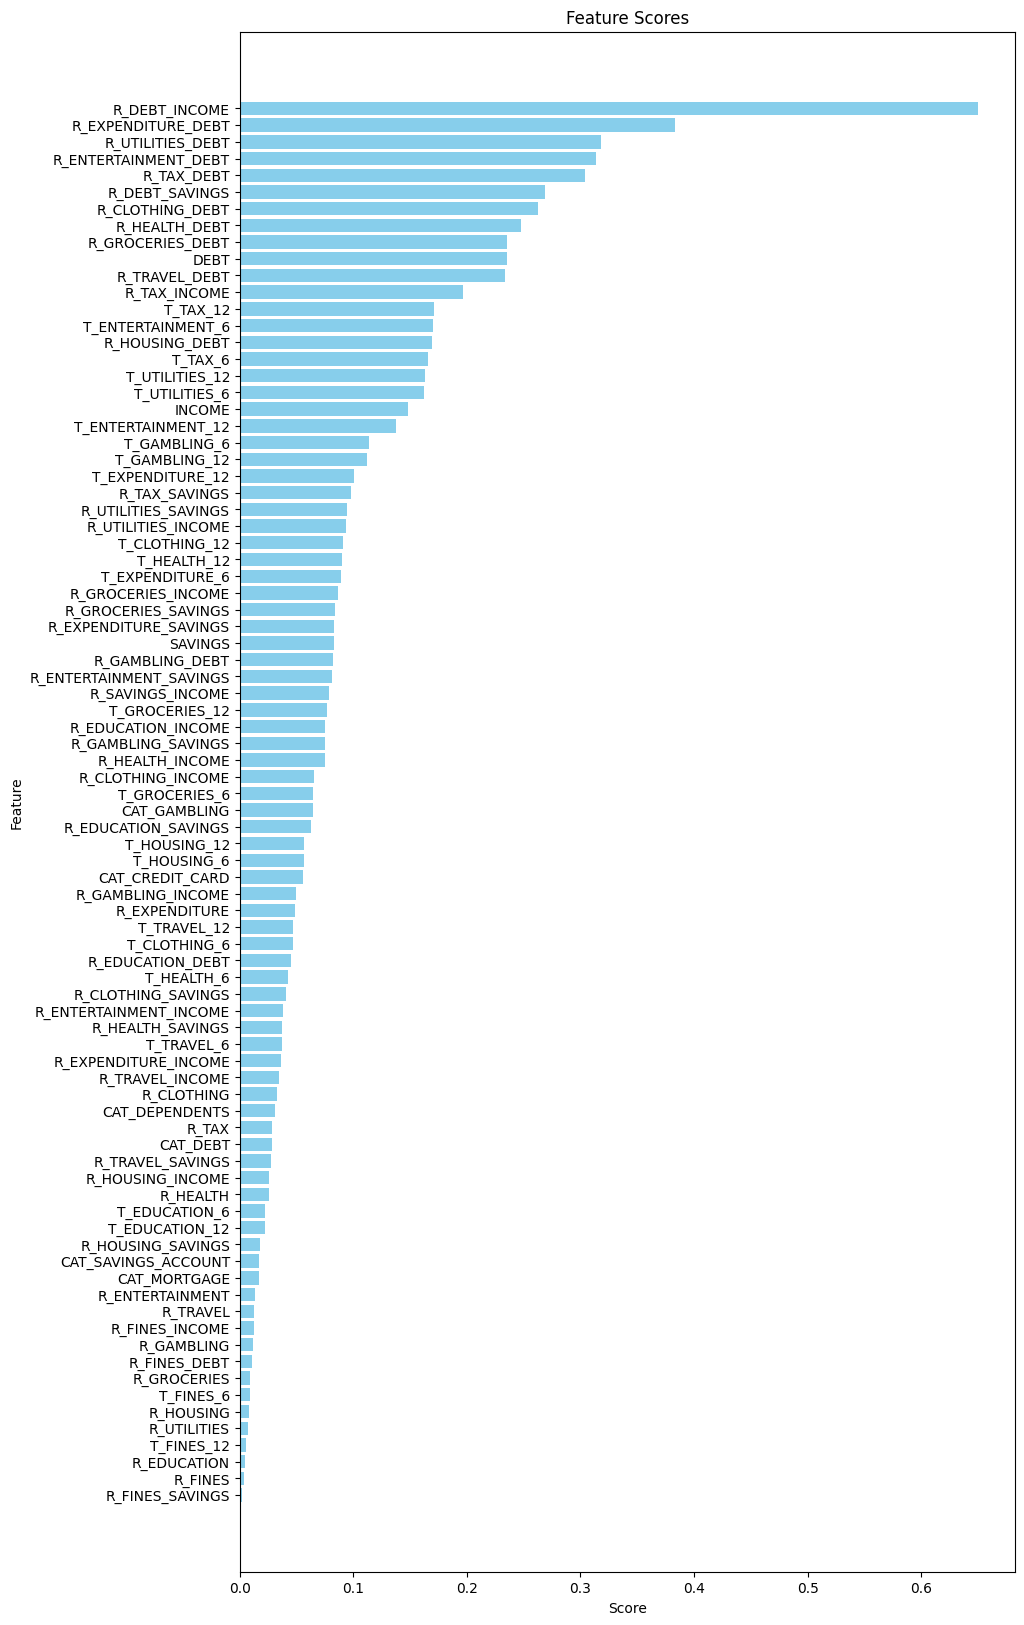

In [88]:
sorted_scores = sorted(scores_mean_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in sorted_scores]
sorted_values = [x[1] for x in sorted_scores]

# Create bar plot
plt.figure(figsize=(10, 20))
plt.barh(sorted_features, sorted_values, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show highest score on top
plt.show()

In [89]:
kbest_mutual_filtered1 = sorted_features[:n_features_per_selector[0]]
kbest_mutual_filtered2 = sorted_features[:n_features_per_selector[1]]
kbest_mutual_filtered3 = sorted_features[:n_features_per_selector[2]]

## RandomForestRegressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.738408)
2. feature 74 (0.037248)
3. feature 33 (0.011169)
4. feature 20 (0.010603)
5. feature 0 (0.008912)
6. feature 59 (0.008328)
7. feature 38 (0.006572)
8. feature 77 (0.006266)
9. feature 2 (0.006165)
10. feature 54 (0.005434)
11. feature 31 (0.005283)
12. feature 62 (0.005034)
13. feature 73 (0.004905)
14. feature 32 (0.004692)
15. feature 72 (0.004677)
16. feature 44 (0.004328)
17. feature 1 (0.004308)
18. feature 14 (0.003829)
19. feature 68 (0.003813)
20. feature 30 (0.003726)
21. feature 9 (0.003699)
22. feature 8 (0.003685)
23. feature 5 (0.003430)
24. feature 42 (0.003419)
25. feature 60 (0.003205)
26. feature 61 (0.003110)
27. feature 41 (0.003071)
28. feature 45 (0.002932)
29. feature 7 (0.002920)
30. feature 71 (0.002870)
31. feature 55 (0.002847)
32. feature 18 (0.002828)
33. feature 26 (0.002819)
34. feature 6 (0.002766)
35. feature 75 (0.002697)
36. feature 34 (0.002662)
37. feature 21 (0.002659)
38. feature 11 (0.002610)
39. feature 4

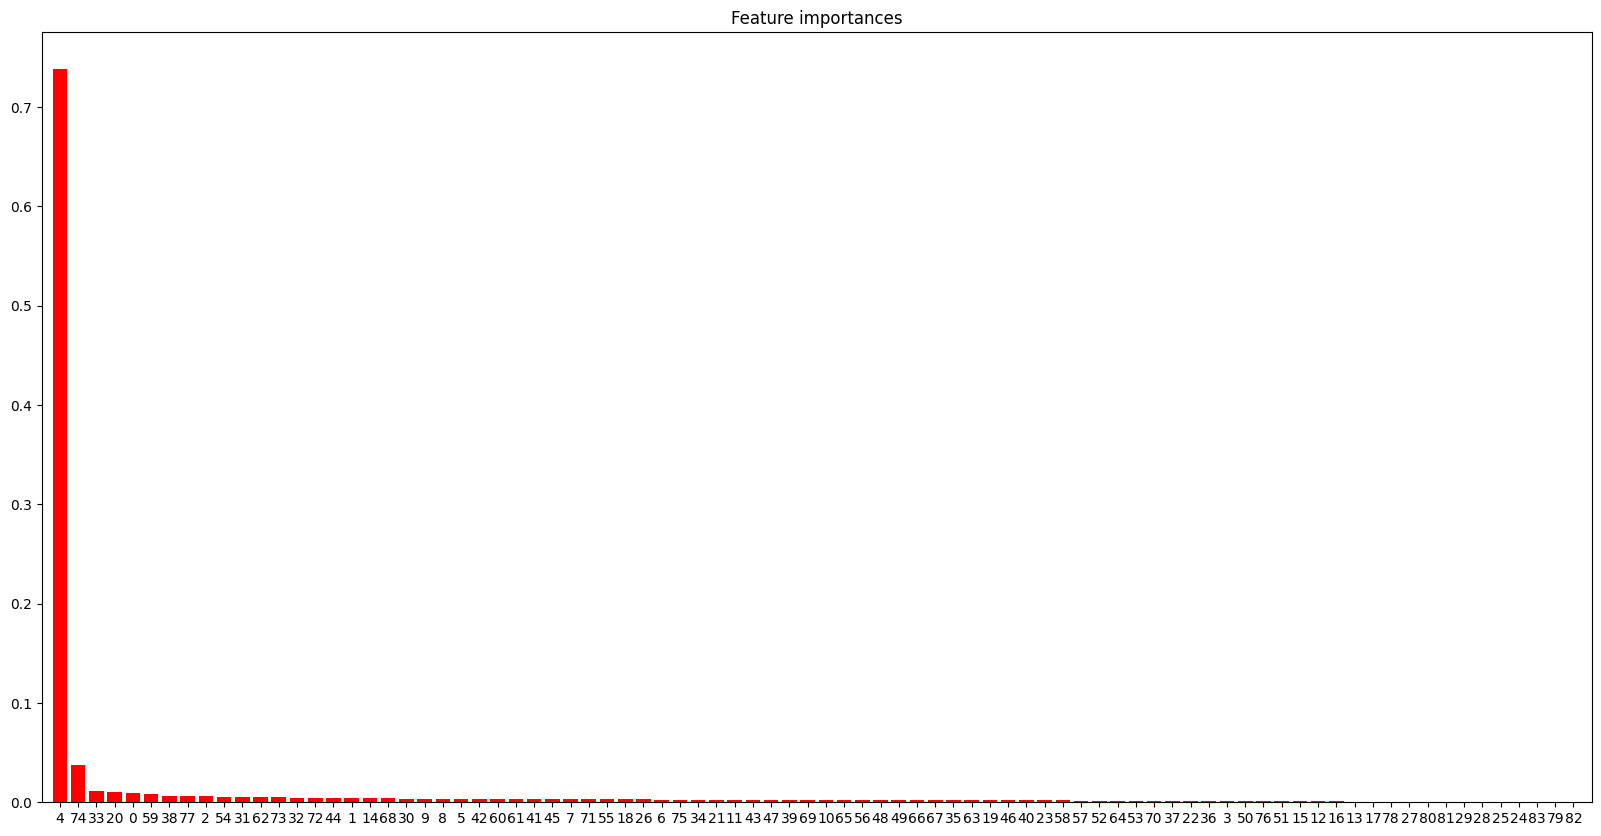

In [92]:
# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [93]:
sorted_features = sorted([(i, k) for i, k in zip(importances, X.columns)] , reverse=True)
rforrest_filtered1 = [x[1] for x in sorted_features[:n_features_per_selector[0]]]
rforrest_filtered2 = [x[1] for x in sorted_features[:n_features_per_selector[1]]]
rforrest_filtered3 = [x[1] for x in sorted_features[:n_features_per_selector[2]]]

## PCA

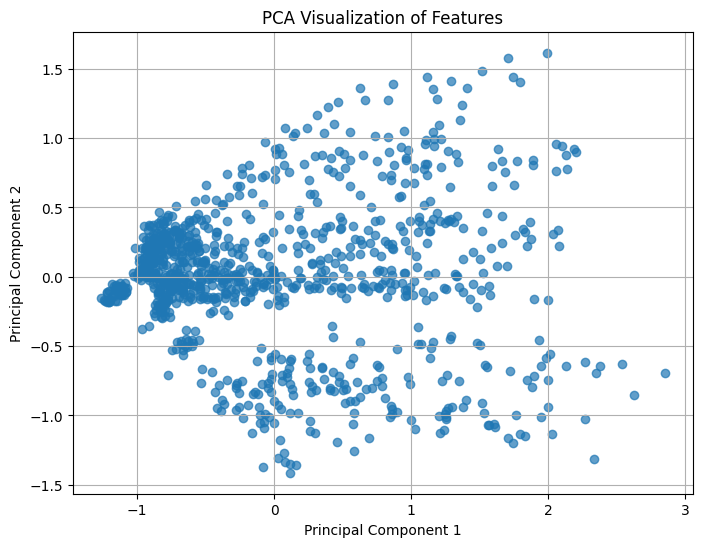

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
# Instantiate PCA with desired number of components
pca = PCA(n_components=2)  # You can change the number of components as needed

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Features')
plt.grid(True)
plt.show()


## Union features

In [95]:
list_to_combine1 = [kbest_freg_filtered1, lasso_filtered1, kbest_mutual_filtered1, rforrest_filtered1]
list_to_combine2 = [kbest_freg_filtered2, lasso_filtered2, kbest_mutual_filtered2, rforrest_filtered2]
list_to_combine3 = [kbest_freg_filtered3, lasso_filtered3, kbest_mutual_filtered3, rforrest_filtered3]
union_features1 = list(set().union(*list_to_combine1))
union_features2 = list(set().union(*list_to_combine2))
union_features3 = list(set().union(*list_to_combine3))

In [99]:
main_df1 = X[union_features1]
main_df2 = X[union_features2]
main_df3 = X[union_features3]
print(main_df1.shape, main_df2.shape, main_df3.shape)

(1000, 13) (1000, 22) (1000, 37)


In [100]:
main_df1["CREDIT_SCORE"] = y
main_df2["CREDIT_SCORE"] = y
main_df3["CREDIT_SCORE"] = y

C:\Users\Gor78\AppData\Local\Temp\ipykernel_6456\2926493868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df1["CREDIT_SCORE"] = y
C:\Users\Gor78\AppData\Local\Temp\ipykernel_6456\2926493868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df2["CREDIT_SCORE"] = y
C:\Users\Gor78\AppData\Local\Temp\ipykernel_6456\2926493868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [101]:
main_df1.to_csv(f"Data/final_data_5.csv", index=False)
main_df2.to_csv(f"Data/final_data_10.csv", index=False)
main_df3.to_csv(f"Data/final_data_15.csv", index=False)

In [102]:
import json

with open(f"Data/selected_features_5.json", "w") as json_file:
    json.dump(union_features1, json_file, indent=4)

with open(f"Data/selected_features_10.json", "w") as json_file:
    json.dump(union_features2, json_file, indent=4)

with open(f"Data/selected_features_15.json", "w") as json_file:
    json.dump(union_features3, json_file, indent=4)
